In [1]:
import numpy as np
import torch
import os
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
os.getcwd()

'e:\\lung_nodule\\segmentation_test\\notebook'

In [3]:
def dice_coef(output, target):
    smooth = 1e-5
    #output = torch.sigmoid(output).view(-1).data.cpu().numpy()
    output = output.view(-1).data.cpu().numpy()
    target = target.view(-1).data.cpu().numpy()
    intersection = (output * target).sum()
    

    return (2. * intersection + smooth) / \
        (output.sum() + target.sum() + smooth)

In [4]:
def my_dice(output, target):
    smooth = 1e-5
    output = torch.sigmoid(output).view(-1).data.cpu().numpy()
    #output = output.view(-1).data.cpu().numpy()
    target = target.view(-1).data.cpu().numpy()
    output_ = output > 0.5
    target_ = target > 0.5
    intersection = (output_ & target_).sum()
    

    return (2. * intersection + smooth) / \
        (output.sum() + target.sum() + smooth)

In [5]:
def my_iou(output,target):
    smooth = 1e-5
    output = output.view(-1).data.cpu().numpy()
    target = target.view(-1).data.cpu().numpy()
    intersection = (output * target).sum()
    
    
    

In [6]:
def iou_score(output, target):
    smooth = 1e-5

    if torch.is_tensor(output):
        output = output.data.cpu().numpy()
    if torch.is_tensor(target):
        target = target.data.cpu().numpy()
    output_ = output > 0.5
    target_ = target > 0.5
    intersection = (output_ & target_).sum()
    union = (output_ | target_).sum()

    return (intersection + smooth) / (union + smooth)

In [7]:
prediction_dir = 'E:\\preprocessing_lidc\\data\\Segmentation_output\\UNET_with_augmentation\\'
actual_mask_dir = 'E:\\preprocessing_lidc\\data\\Mask\\LIDC-IDRI-0018\\0018_MA000_slice001.npy'

In [8]:
prediction = np.load(prediction_dir + '0018_PD000_slice001.npy')
mask = np.load(actual_mask_dir)

In [9]:
predict = torch.tensor(prediction)
mask = torch.tensor(mask)

In [10]:
np.unique(mask)

array([False,  True])

In [11]:
def view_img(prediction, mask):
    fig,ax = plt.subplots(1,2, figsize=(15,15))
    ax[0].title.set_text('Original Mask')
    ax[0].imshow(mask)
    ax[0].grid()
    ax[1].title.set_text('Prediction Mask')
    ax[1].imshow(mask)
    ax[1].grid()
    plt.show()
    predict = torch.tensor(prediction)
    mask = torch.tensor(mask)
    print("DICE COEFFICIENT IS",dice_coef(predict,mask))
    print("MY DICE COEFFICIENT IS",my_dice(predict,mask))
    print("IOU IS",iou_score(predict,mask) )
    #print("BCE LOSS IS",F.binary_cross_entropy_with_logits(prediction, mask))


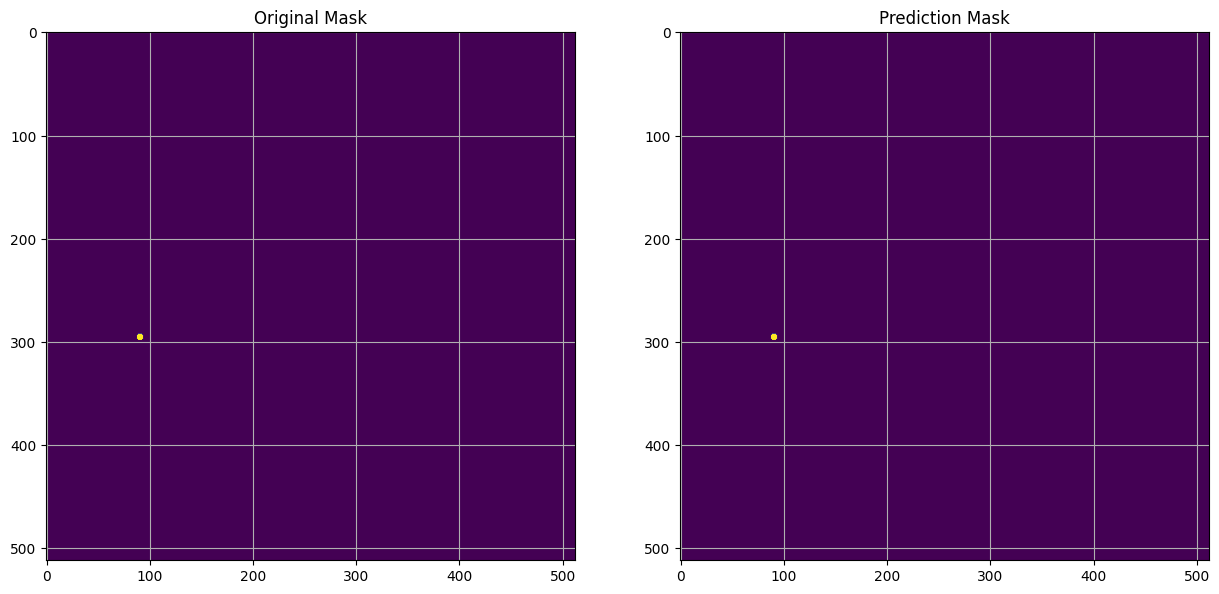

DICE COEFFICIENT IS 0.950819680193495
MY DICE COEFFICIENT IS 0.00044237433415546154
IOU IS 0.9062500292968657


C:\Users\vinic\AppData\Local\Temp\ipykernel_15976\3419618567.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predict = torch.tensor(prediction)
C:\Users\vinic\AppData\Local\Temp\ipykernel_15976\3419618567.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask)


In [12]:
view_img(predict, mask)

In [31]:
torch

<module 'torch' from 'c:\\Users\\vinic\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\torch\\__init__.py'>

In [32]:
predict.sum()

tensor(32.)

In [33]:
predict

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [34]:
torch.histc(predict)

tensor([2.6211e+05, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+

In [35]:
torch.sigmoid(predict).sum()

tensor(131079.3906)

In [36]:
torch.sigmoid(output).view(-1).data.cpu().numpy()

NameError: name 'output' is not defined

In [ ]:
dice

In [ ]:
x = torch.tensor([0.5, 1, 0])
y = torch.tensor([0, 1, 0])

In [ ]:
dice_coef(x,y)

In [ ]:
iou_score(x,y)

In [ ]:
np_array = np.zeros((6,1,512,512))

In [ ]:
np_array.shape

In [ ]:
type(np_array)

In [ ]:
np_array[0,:,:,:].shape

In [ ]:
np.squeeze(np_array, axis=1).shape

In [ ]:
np_array.shape